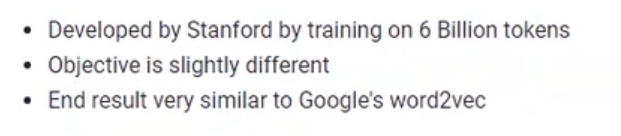

**addresses the problem of word2vec**:
Word2vec relies only on local information of language. That is, the semantics learnt for a given word, is only affected by the surrounding words

 The advantage of GloVe is that, unlike Word2vec, GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors.

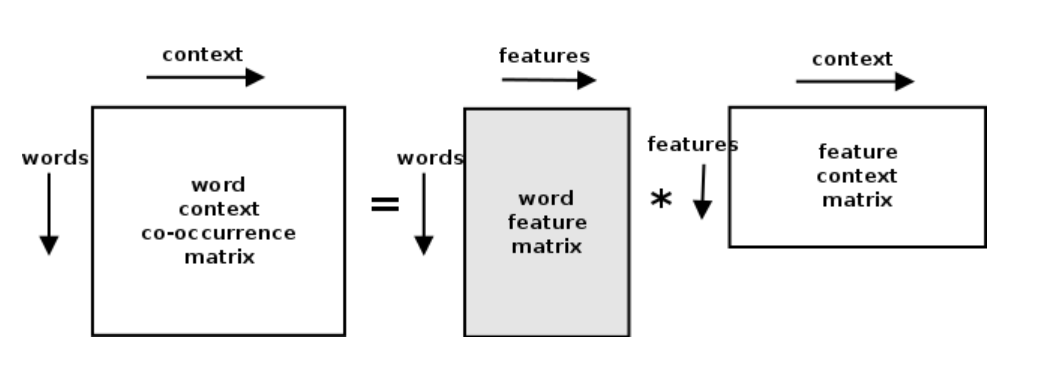

In [6]:
import tensorflow as tf
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.layers import Dense, Embedding, Input, Add, Dot, Reshape, Flatten
from tensorflow.keras.optimizers import Adam 

from tensorflow.python.keras.preprocessing.sequence import skipgrams
from tensorflow.python.keras.models import Model, load_model

import tarfile
from urllib.request import urlretrieve
import os
import nltk
from scipy.sparse import csr_matrix, lil_matrix
import numpy as np
from scipy.sparse import save_npz, load_npz
from tensorflow.python.keras import backend as K
import random
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
import pandas as pd
%matplotlib inline

In [26]:
import os
import urllib.request

If you use Word2vec, it wouldn’t capture information like,
is “the” a special context of the words “cat” and “mat” ?
or
is “the” just a stopword?
This can be suboptimal, especially in the eye of theoreticians.

# SIMILAR WORDS

# method 1:

In [12]:
from gensim.scripts.glove2word2vec import glove2word2vec

glove_input_file='glove.6B.100d.txt'
word2vec_output_file='glove.6B.100d.w2vformat.txt'
glove2word2vec(glove_input_file,word2vec_output_file)

<ipython-input-12-d127d3bcd4f7>:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file,word2vec_output_file)


(400000, 100)

In [13]:
from gensim.models.keyedvectors import KeyedVectors
glove_model=KeyedVectors.load_word2vec_format("glove.6B.100d.w2vformat.txt",binary=False)

In [14]:
#checking performance of glove model
glove_model.most_similar("king")

[('prince', 0.7682329416275024),
 ('queen', 0.7507690787315369),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775828361511),
 ('monarch', 0.6977890729904175),
 ('throne', 0.691999077796936),
 ('kingdom', 0.6811409592628479),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074266433716)]

In [15]:
glove_model.most_similar(positive=["king","woman"], negative=['man'],topn=5)

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534157752991)]

# Method 2

In [18]:
emmbed_dict = {}
with open('glove.6B.100d.txt','r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:],'float32')
    emmbed_dict[word]=vector

In [22]:
from scipy import spatial
def find_similar_word(emmbedes):
  nearest = sorted(emmbed_dict.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict[word], emmbedes))
  return nearest

In [24]:
#top 10 similar words for the word ‘river’
find_similar_word(emmbed_dict['river'])[0:10]

['river',
 'rivers',
 'creek',
 'lake',
 'danube',
 'valley',
 'basin',
 'flows',
 'canal',
 'estuary']

C:\Users\91890\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\91890\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


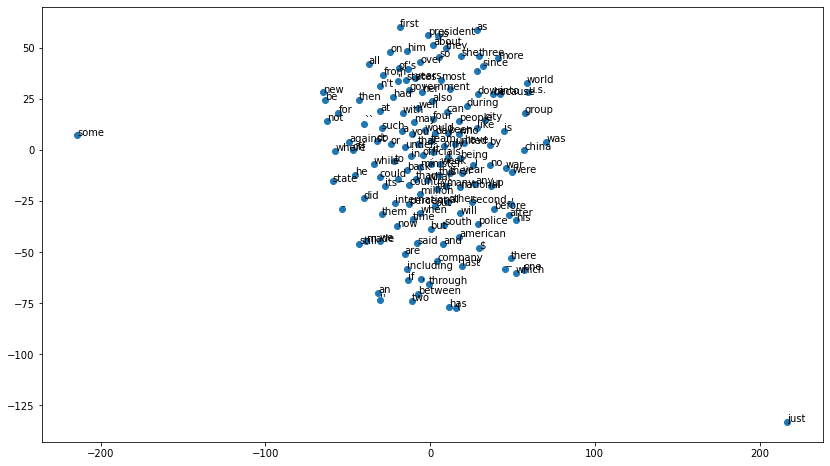

In [28]:
#VISUALISING VECTORS
from sklearn.manifold import TSNE

distri = TSNE(n_components=2)
words = list(emmbed_dict.keys())
vectors = [emmbed_dict[word] for word in words]
y = distri.fit_transform(vectors[700:850])
plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1])
for label,x,y in zip(words,y[:, 0],y[:,1]):
  plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()